In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import shapely as shp


In [2]:
with open("output.json", "r") as f:
    data = json.load(f)


In [3]:
def create_figure_plt(
    with_trajectories=False,
    num_trajectories: int = 100,
    with_polygons=False,
) -> tuple:
    """This function generates a matplotlib figure showing the fundamental digram,
    using the currently generated interfaces stored in self.interfaces.

    Trajectories can also be plotted, if specified.

    Args:
        with_trajectories (bool, optional): Whether or not to plot trajectories.
        Defaults to False.

    Returns:
        tuple[Figure, Axes]: the figure and axes of the generated image
    """

    fig, ax = plt.subplots(figsize=(20, 10))

    figure = data

    for graph_polygon in figure["polygons"]:
        polygon = shp.Polygon(
            [(x["time"], x["position"]) for x in graph_polygon["points"]]
        )
        print(polygon.area)
        ax.add_patch(
            patches.Polygon(
                polygon.exterior.coords,
                closed=True,
                alpha=0.5,
            )
        )
        ax.annotate(
            graph_polygon["label"],
            (graph_polygon["point"]["time"], graph_polygon["point"]["position"]),
            horizontalalignment="center",
            verticalalignment="center",
        )

    for user_interface in figure["user_interfaces"]:
        ax.plot(
            (user_interface["point1"]["time"], user_interface["point2"]["time"]),
            (
                user_interface["point1"]["position"],
                user_interface["point2"]["position"],
            ),
            alpha=0.9,
            linestyle="dashed",
        )

    for interface in figure["interfaces"]:
        ax.plot(
            (interface["point1"]["time"], interface["point2"]["time"]),
            (interface["point1"]["position"], interface["point2"]["position"]),
            marker="o",
        )

    for trajectory in figure["trajectories"]:
        for i in range(len(trajectory) - 1):
            point1 = trajectory[i]
            point2 = trajectory[i + 1]

            ax.plot(
                (point1["time"], point2["time"]),
                (point1["position"], point2["position"]),
                linewidth=0.5,
                alpha=0.8,
            )

    ax.set_xbound(figure["min_time"], figure["max_time"])
    ax.set_ybound(figure["min_pos"], figure["max_pos"])

    ax.set_title("Shockwave Diagram")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Position (meters)")

    plt.close(fig)

    return (fig, ax)


In [4]:
len(data["polygons"])

4

4840.0
199.99999999999986
33436.0
6059.999999999996


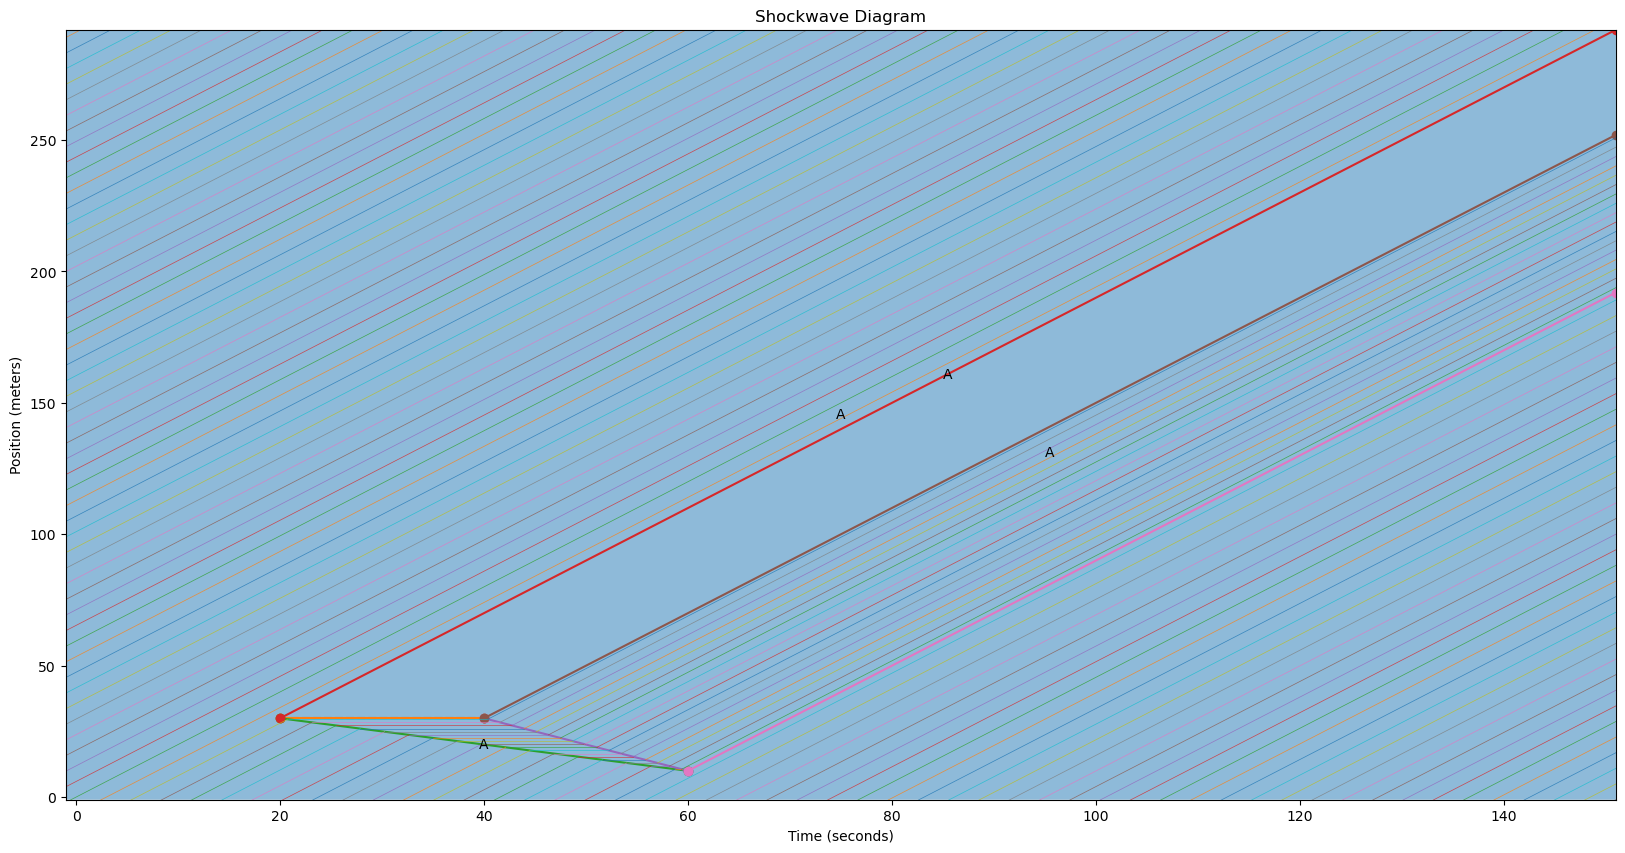

In [5]:
fig, ax = create_figure_plt(True)
fig
